In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolfrom pathlib import Pathkit and Object Relational Mapper
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurment = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurment.date).order_by(measurment.date.desc()).first()

#output:
#('2017-08-23',)

('2017-08-23',)

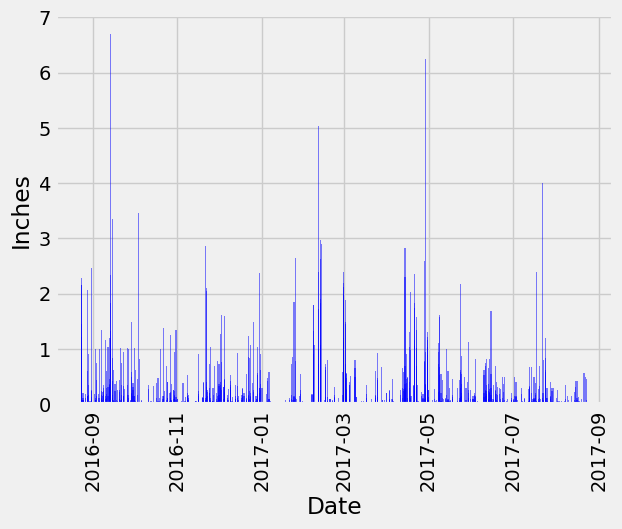

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
    # hard coding Date format based on last output

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_search = session.query(*[measurment.date, measurment.prcp]).\
    filter(measurment.date > last_year).\
    order_by(measurment.date).all()
prcp_search

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_search, columns=['date','prcp'])


# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date", ascending=True)
prcp_df = prcp_df.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
x = prcp_df['date']
x = np.asarray(x, dtype='datetime64[s]')
y = prcp_df['prcp']
    #x_tick = ['2016-08-23','2016-10-01','2016-11-09","2016-12-19', '2017-01-28', '2017-03-09', '2017-04-28', '2017-05-31', '2017-07-10']
    #tick_locations = [value for value in x_tick]
plt.bar(x, y, color='b', alpha=0.5, align="center")
    #plt.xticks(tick_locations, x, rotation="vertical")
plt.xticks(rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()
# bin attempt didn't work. Secondary attempt of manual tick placement also didn't work. 

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()
#output
#[(9,)]

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

location_count = session.query(*[measurment.station,func.count(measurment.station)]).\
    group_by(measurment.station).\
    order_by(func.count(measurment.station).desc()).all()
location_count
    

#output
#[('USC00519281', 2772),
 #('USC00519397', 2724),
 #('USC00513117', 2709),
 #('USC00519523', 2669),
 #('USC00516128', 2612),
 #('USC00514830', 2202),
 #('USC00511918', 1979),
 #('USC00517948', 1372),
 #('USC00518838', 511)]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
avg = session.query(*[func.avg(measurment.tobs)]).\
    filter(measurment.station == 'USC00519281').all()
avg

[(71.66378066378067,)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#session.query(Dow.date, 
low = session.query(measurment.tobs).\
    filter(measurment.station == 'USC00519281').\
    order_by(measurment.tobs).first()
print(low)
high = session.query(measurment.tobs).\
    filter(measurment.station == 'USC00519281').\
    order_by(measurment.tobs.desc()).first()
print(high)
avg = session.query(func.avg(measurment.tobs)).\
    filter(measurment.station == 'USC00519281').\
    order_by(measurment.tobs.desc()).first()
print(avg)

#couldn't find example on how to get first + last results in single querry
        
#output
#[(54.0, 85.0, 71.66378066378067)]

(54.0,)
(85.0,)
(71.66378066378067,)


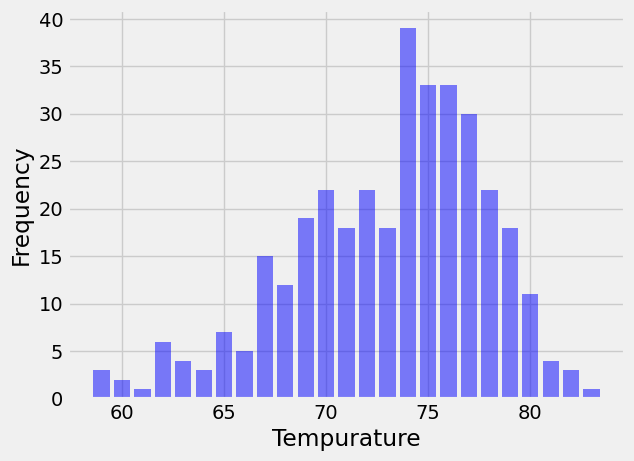

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and precipitation scores
temp_search = session.query(*[measurment.tobs,func.count(measurment.tobs)]).\
    filter(measurment.date > last_year).\
    filter(measurment.station == 'USC00519281').\
    group_by(measurment.tobs).\
    order_by(measurment.tobs).all()
temp_search

temp_df = pd.DataFrame(temp_search, columns=['temp','freq'])
temp_df = temp_df.sort_values("temp", ascending=True)
temp_df = temp_df.reset_index(drop=True)


x = temp_df['temp']
y = temp_df['freq']
plt.bar(x, y, color='b', alpha=0.5, align="center")
plt.xticks(rotation="horizontal")
plt.xlabel("Tempurature")
plt.ylabel("Frequency")
plt.show()

#frequency of temperatures don't align with example graph given. unsure why mine doesn't match up. Same logic was sucessful in line 13. 


# Close Session

In [17]:
# Close Session
session.close()